<a href="https://colab.research.google.com/github/kang9366/Cifar-10-Image-Classification/blob/main/Cifar_10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 모듈 import

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, MaxPool2D, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 데이터셋 다운로드, 전처리

In [3]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [4]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=66, test_size=0.1)

In [5]:
print("X_train shape : ", X_train.shape)
print("Train size : ", X_train.shape[0])
print("Validation size : ", X_val.shape[0])
print("Test size : ", X_test.shape[0])

X_train shape :  (45000, 32, 32, 3)
Train size :  45000
Validation size :  5000
Test size :  10000


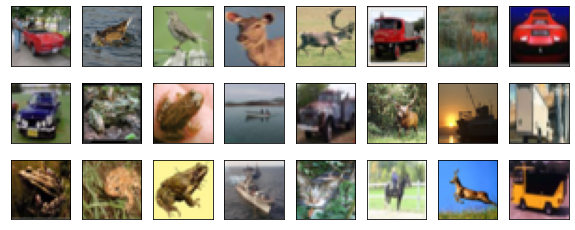

In [7]:
fig = plt.figure(figsize=(10,4))

for i in range(24):
    ax = fig.add_subplot(3, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [ ]:
train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split=0.1)

train_gen.fit(X_train)

## 모델 구성

In [ ]:
model = Sequential([
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', input_shape=(32,32,3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding = 'same'),

    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding = 'same'),

    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding = 'same'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, Activation('relu')),
    tf.keras.layers.Dense(10, Activation('softmax'))
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                      

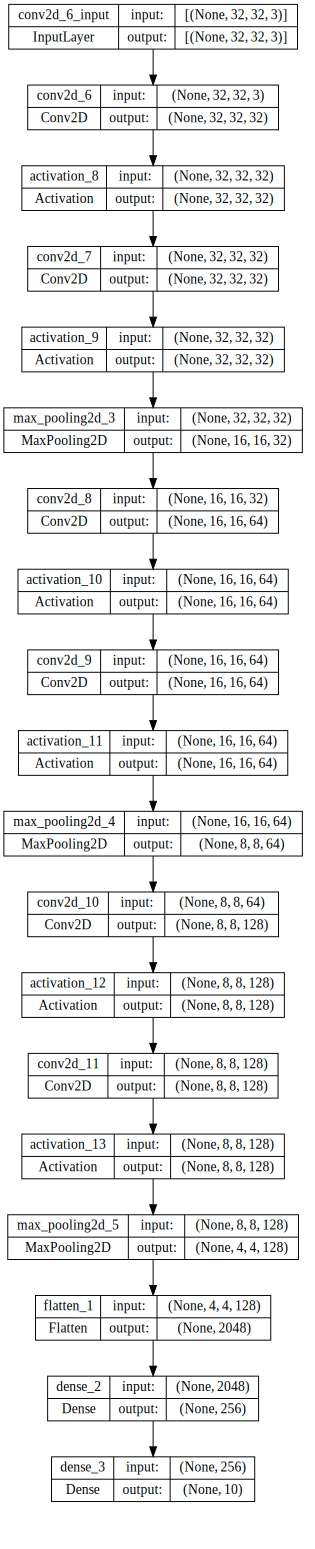

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline
dot_res = model_to_dot(model,show_shapes=True, dpi=50).create(prog='dot', format='svg')
fi = open("dotres.svg", 'wb')
fi.write(dot_res)
fi.close()

SVG(model_to_dot(model, show_shapes = True, dpi=70).create(prog = 'dot', format = 'svg'))

## 모델 학습

In [ ]:
history = model.fit_generator(train_gen.flow(X_train, y_train, batch_size=128), epochs = 20, validation_data=(X_val, y_val),verbose = 1)

Epoch 1/20
  1/352 [..............................] - ETA: 30s - loss: 2.0681 - accuracy: 0.1641

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


352/352 [==============================] - 24s 69ms/step - loss: 1.8935 - accuracy: 0.2678 - val_loss: 1.8435 - val_accuracy: 0.3244
Epoch 2/20
352/352 [==============================] - 24s 69ms/step - loss: 1.6902 - accuracy: 0.3634 - val_loss: 1.5573 - val_accuracy: 0.4174
Epoch 3/20
352/352 [==============================] - 25s 70ms/step - loss: 1.5686 - accuracy: 0.4174 - val_loss: 1.4678 - val_accuracy: 0.4584
Epoch 4/20
352/352 [==============================] - 25s 70ms/step - loss: 1.4770 - accuracy: 0.4558 - val_loss: 1.4941 - val_accuracy: 0.4702
Epoch 5/20
352/352 [==============================] - 24s 68ms/step - loss: 1.3838 - accuracy: 0.4950 - val_loss: 1.3609 - val_accuracy: 0.5100
Epoch 6/20
352/352 [==============================] - 24s 69ms/step - loss: 1.3208 - accuracy: 0.5198 - val_loss: 1.2776 - val_accuracy: 0.5352
Epoch 7/20
352/352 [==============================] - 24s 68ms/step - loss: 1.2629 - accuracy: 0.5426 - val_loss: 1.1995 - val_accuracy: 0.5674
Epo

## 모델 평가

### loss

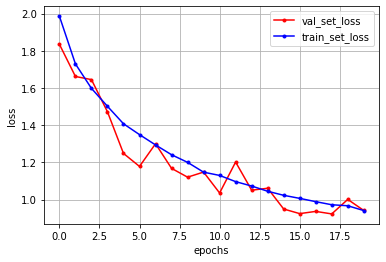

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

### accuracy

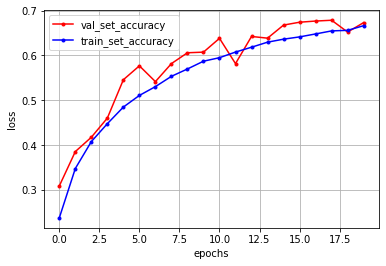

In [ ]:
y_vloss = history.history['val_accuracy']
y_loss = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_accuracy')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

### model evaluate

In [ ]:
model.evaluate(X_test, y_test, batch_size = 128, verbose=1)

79/79 [==============================] - 1s 7ms/step - loss: 0.8763 - accuracy: 0.6941


[0.8762514591217041, 0.694100022315979]